### Data Augmentation in Keras example

This example shows how to use keras's Datagenerator function to create Data Augmentation. A single image is taken and multiple images by rotating, flipping, shifting etc. The genrated images are stored back to disk for preview.
If you intend to use this while training your model you need not save back to disk. 

In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image
import os 

Using TensorFlow backend.


In [2]:
# defining the  ImageGenerator options here 
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [3]:

img = load_img('fruit.jpeg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory. Here we are generating 20 images
i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='preview',
                          save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i > 4:
        break  # otherwise the generator would loop indefinitely

In [4]:
# reading the stored image_names so that we can view them later  

!ls preview > image_names.txt

fname = 'image_names.txt'
with open(fname) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
image_names = [x.strip() for x in content] 

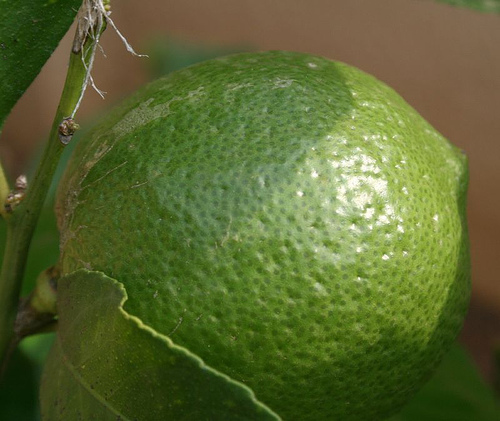

In [5]:
# viewing the original input image 
images_path = './'
Image.open(images_path + 'fruit.jpeg')

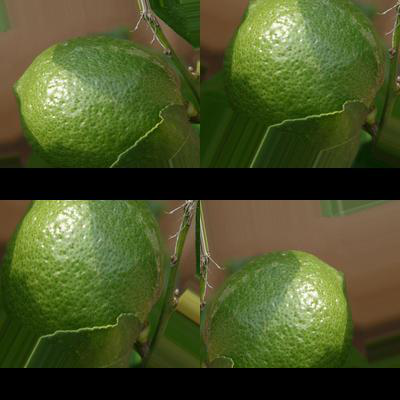

In [13]:
#viewing the generated augmented images 

images_path = './preview/'
files = []
for image_name in image_names: 
    file_path = images_path + image_name
    files.append(file_path)
    
#Image.open(images_path + image_name)
result = Image.new("RGB", (400, 400))

for index, file in enumerate(files):
    path = os.path.expanduser(file)
    img = Image.open(path)
    img.thumbnail((200, 200), Image.ANTIALIAS)
    x = index // 2 * 200
    y = index % 2 * 200
    w, h = img.size
    #print('pos {0},{1} size {2},{3}'.format(x, y, w, h))
    result.paste(img, (x, y, x + w, y + h))

result.save(os.path.expanduser('./combines_image.jpg'))
Image.open('./combines_image.jpg')
